# Assgn_05

# Count white dots on a black background  

Count the white dots in the image


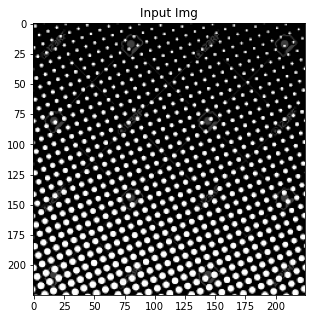

In [1]:
import cv2
from matplotlib import pyplot as plt

path ="./images/white-dot.png"
gray = cv2.imread(path, 0)

plt.figure(figsize=(5, 5))
plt.imshow(gray, cmap='gray'),plt.axis('on'),plt.title('Input Img')
plt.show()

* file name = 'your_name_assgn_05.pdf' (code and ontput)
* Upload to LMS before the next Monday, 16 Oct, 0900 a.m.

## Answer

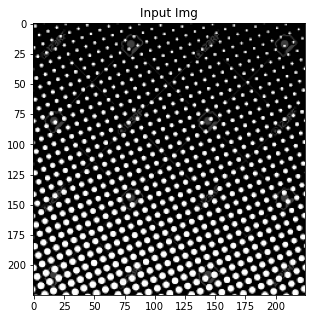

In [1]:
import cv2
from matplotlib import pyplot as plt

path ="./images/white-dot.png"
img = cv2.imread(path, 0)
cp_img = img.copy()

cv2.imshow("DOT img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray'),plt.axis('on'),plt.title('Input Img')
plt.show()


Dots number: 762



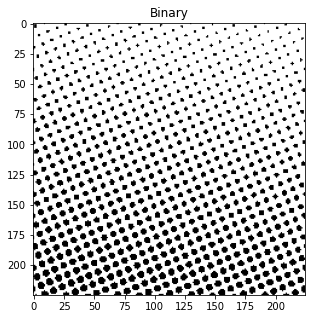

In [2]:
img = cv2.imread(path)
cp_img = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

th, threshed = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)   # threshold

# findcontours  cv2.RETR_LIST → Retrieve all contours
cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]

# filter by area
s1 = 3
s2 = 100
xcnts = []
for cnt in cnts:
    if s1 < cv2.contourArea(cnt) < s2:
        xcnts.append(cnt)

        
        import sys

print("\n\x1b[43mDots number: {}\n".format(len(xcnts)), file=sys.stderr)

# cv2.imshow("threshed", threshed)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(5, 5))
plt.imshow(threshed, cmap='gray')
plt.title("Binary")
plt.show()


### Redraw the dot on the blank image

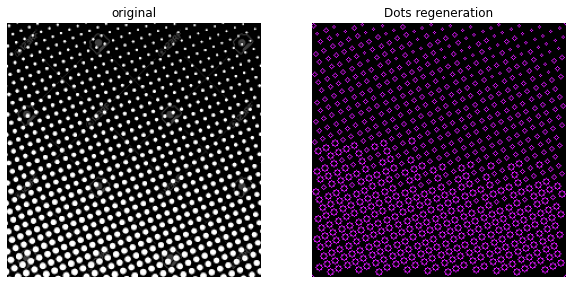

In [3]:
import numpy as np
blank_image = np.zeros((225, 225, 3), np.uint8)

for i in range (len(cnts)):
    (x,y),radius = cv2.minEnclosingCircle(cnts[i])
    center = (int(x),int(y))
    radius = int(radius)
    cv2.circle(blank_image, center, radius, (255, 23, 223), 1)
#     print('Circle ' + str(i) + ': Center = ' + str(center) + ' Radius = ' + str(radius))


fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(cv2.cvtColor(cp_img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(blank_image, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('Dots regeneration');